#### Main Params

In [59]:
dims = 3000
step_n = 10
r = 1  

#### Random Walk Func

In [60]:
import numpy as np
import matplotlib.pyplot as plt


def rand_dir(dims):
    vec = np.random.randn(dims) # rand vector 
    return vec / np.linalg.norm(vec) # normalizing the vector, np.linalg.norm returns len

def rand_walk(step_n, dims, r):
  steps = np.zeros((step_n, dims)) # stores all steps
  init_pos = np.zeros(dims) # origin

  pos = init_pos
  for i in range(step_n):
      direction = rand_dir(dims) # get direction
      step_size = np.random.uniform(0, r) # sample from uniform distribution
      pos = pos + direction * step_size # move to new position
      if np.linalg.norm(pos) > r:
        pos = pos / np.linalg.norm(pos) * r # clip the vec if you moved outside the ball
      steps[i] = pos
  return steps

##### Dry Run

In [61]:
steps = rand_walk(step_n, dims, r)

#### 2D Random Walk Viz

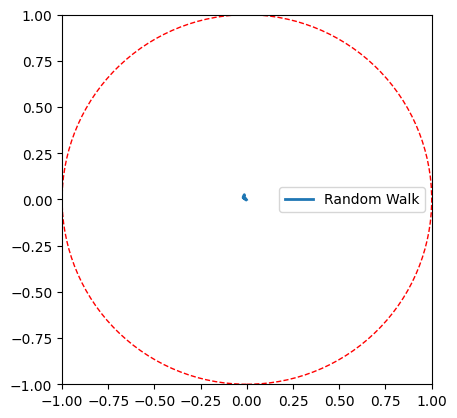

In [68]:
path_2d = steps[:, :2]

fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.plot(path_2d[:, 0], path_2d[:, 1], lw=2, label="Random Walk")

circle = plt.Circle((0, 0), r, color='red', fill=False, linestyle='--')
ax.add_artist(circle)

ax.set_aspect('equal')
ax.legend()
plt.show()

#### Dist Histogram Viz

[0.26941621 0.97462066 1.         1.         1.         1.
 1.         1.         1.         1.        ]


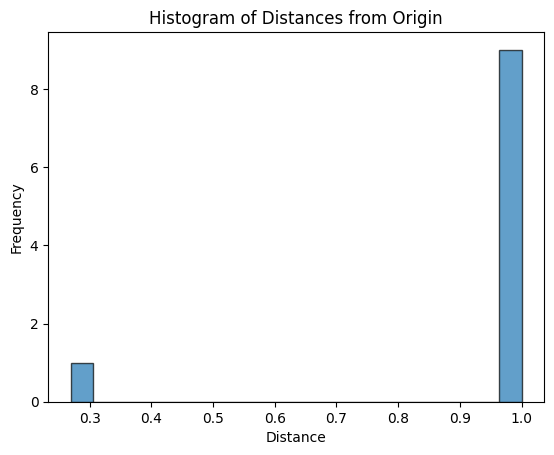

In [65]:
distances = np.linalg.norm(steps, axis=1)
print(distances)
fig, ax = plt.subplots()
ax.hist(distances, bins=20, edgecolor='black', alpha=0.7)
ax.set_title('Histogram of Distances from Origin')
ax.set_xlabel('Distance')
ax.set_ylabel('Frequency')

plt.show()

#### Multiple Viz

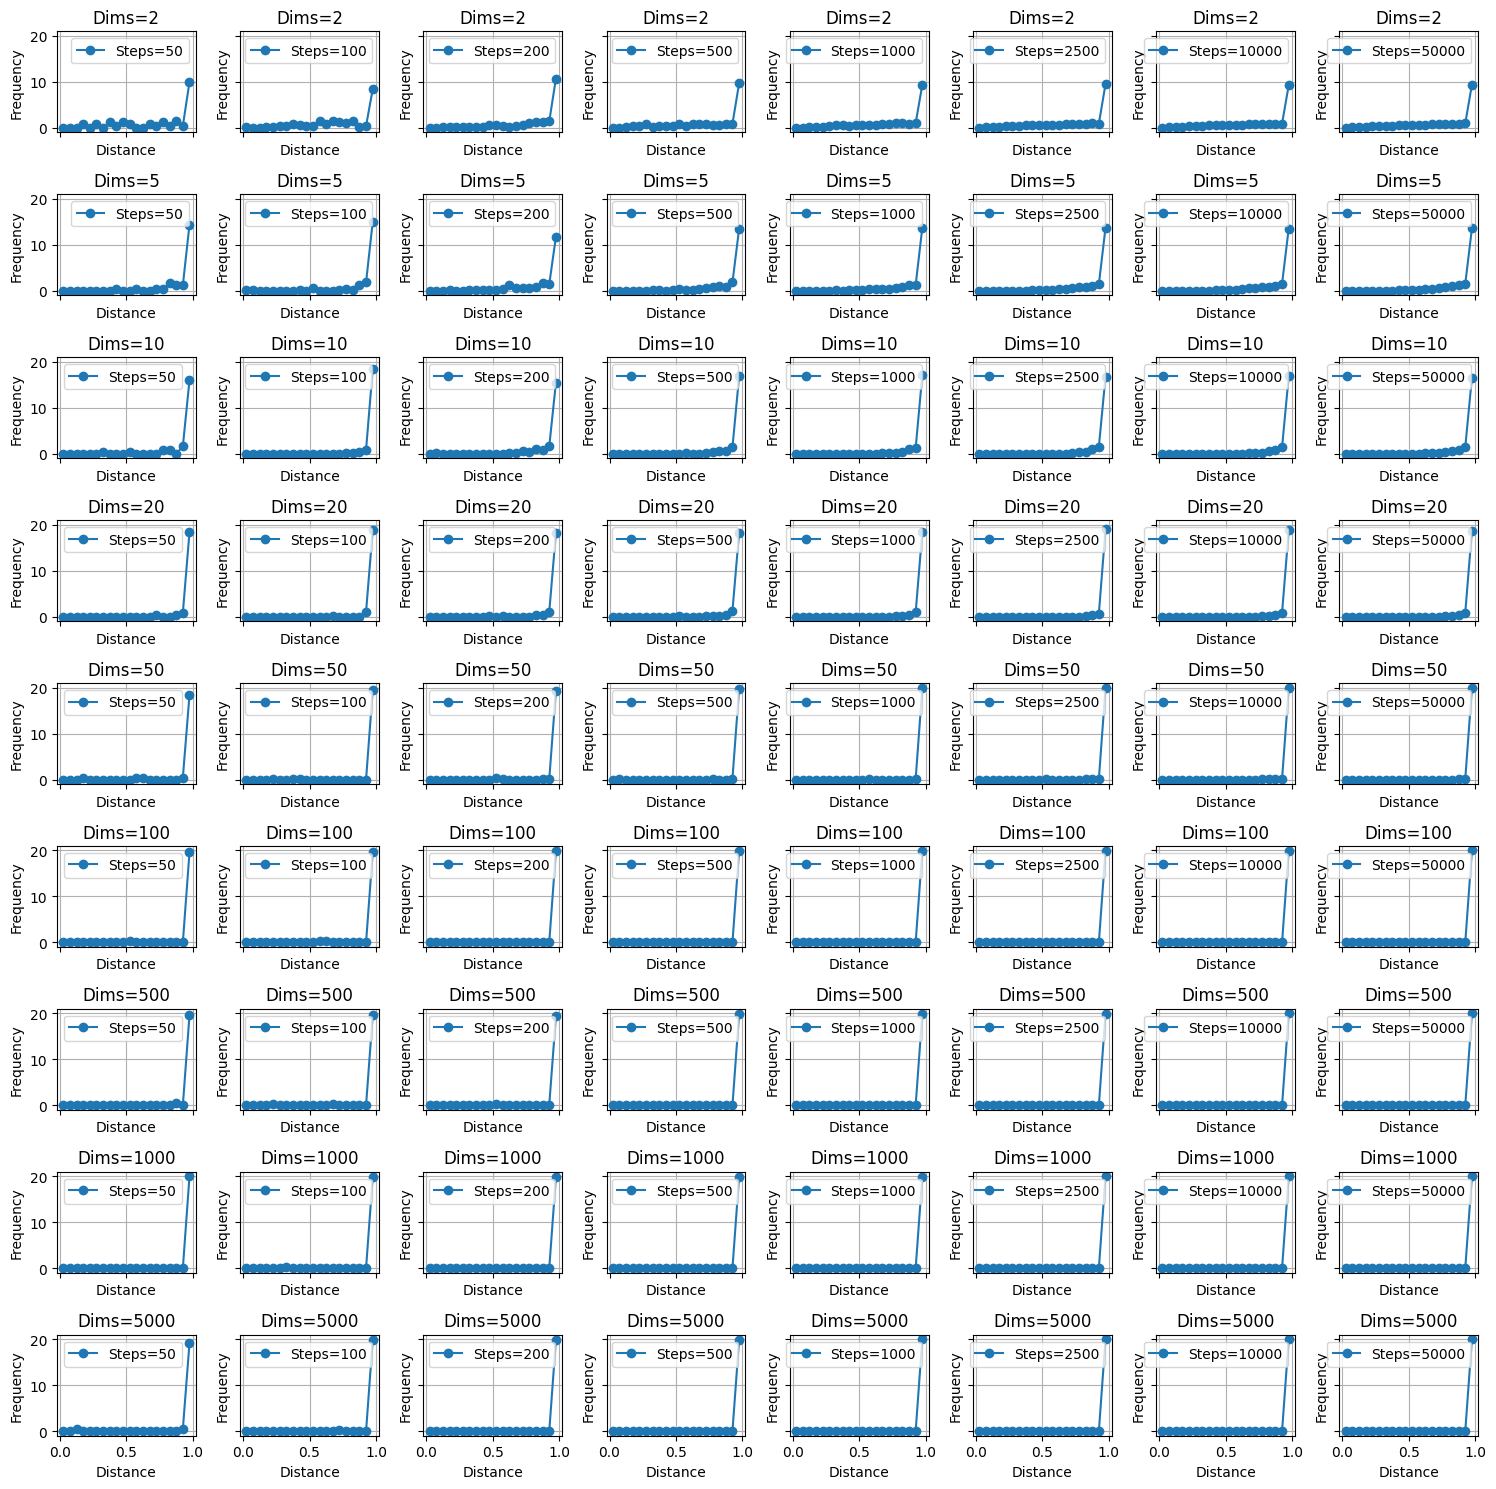

In [57]:
dims_list = [2, 5, 10, 20, 50, 100, 500, 1000, 5000]  
steps_list = [50, 100, 200, 500, 1000, 2500, 10000, 50000]  


fig, axs = plt.subplots(len(dims_list), len(steps_list), figsize=(15, 15), sharex=True, sharey=True)

for i, dims in enumerate(dims_list):
    for j, step_n in enumerate(steps_list):
        steps = rand_walk(step_n, dims, r)
        distances = np.linalg.norm(steps, axis=1)
        hist, bins = np.histogram(distances, bins=20, range=(0, r), density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        
        ax = axs[i, j]
        ax.plot(bin_centers, hist, marker='o', linestyle='-', label=f'Steps={step_n}')
        ax.set_title(f'Dims={dims}')
        ax.set_xlabel('Distance')
        ax.set_ylabel('Frequency')
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.show()


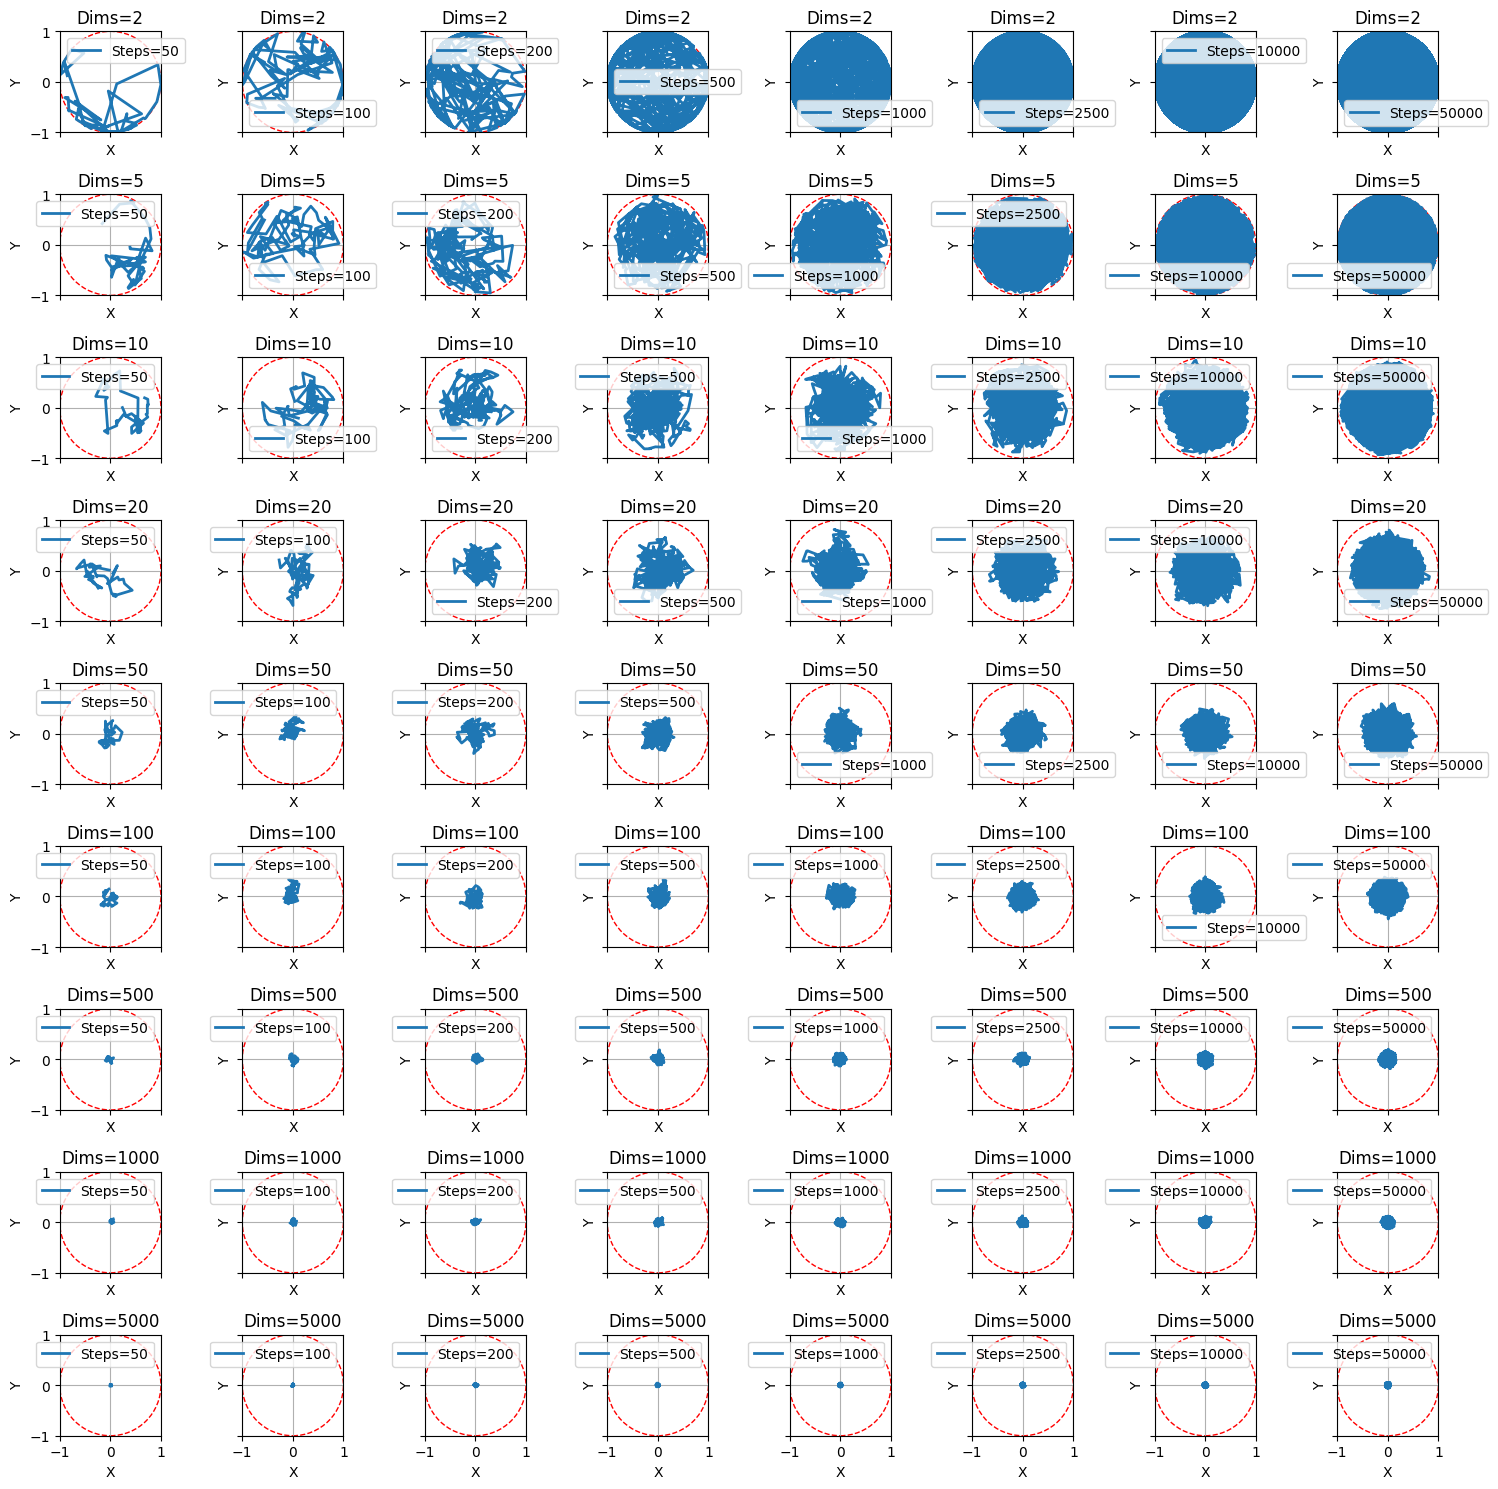

In [58]:
fig, axs = plt.subplots(len(dims_list), len(steps_list), figsize=(15, 15), sharex=True, sharey=True)

for i, dims in enumerate(dims_list):
    for j, step_n in enumerate(steps_list):
        steps = rand_walk(step_n, dims, r)
        path_2d = steps[:, :2]
        
        ax = axs[i, j]
        ax.plot(path_2d[:, 0], path_2d[:, 1], lw=2, label=f'Steps={step_n}')
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.add_artist(plt.Circle((0, 0), r, color='red', fill=False, linestyle='--'))
        ax.set_aspect('equal')
        ax.set_title(f'Dims={dims}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.show()


### Other tests

In [72]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

/tmp/ipykernel_21065/4204168604.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


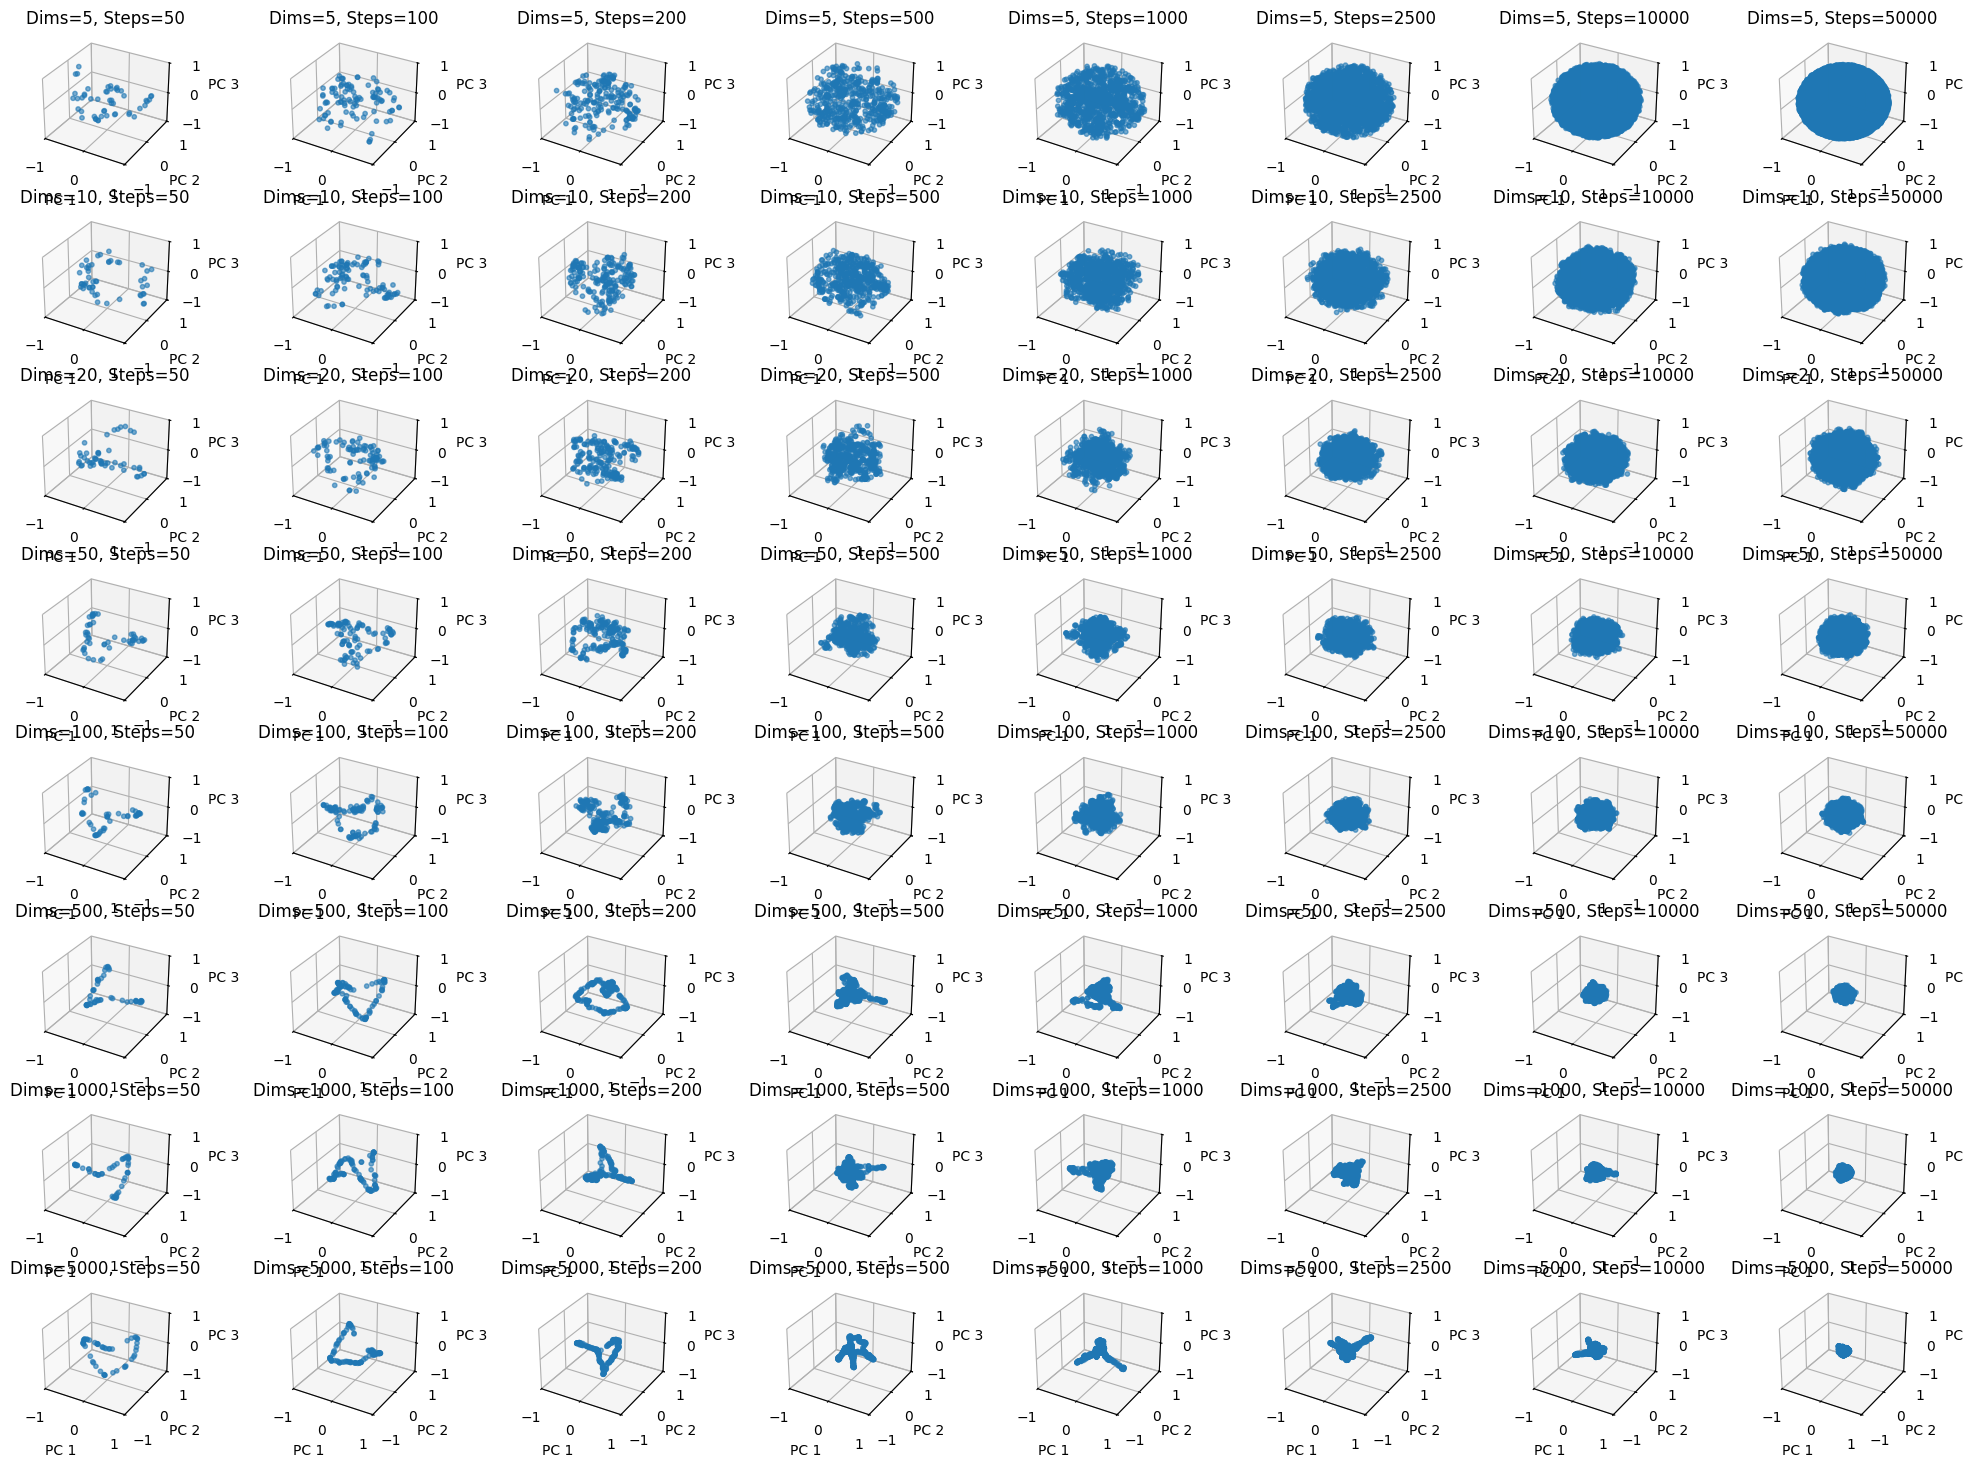

In [87]:
fig = plt.figure(figsize=(20, 16), layout='constrained')
ax_count = len(dims_list) * len(steps_list)
cols = len(steps_list)
rows = len(dims_list)
axes = []

for i, dims in enumerate(dims_list):
    for j, step_n in enumerate(steps_list):
        if dims < 3: # skip 2d xD
            continue
        
        steps = rand_walk(step_n, dims, r)
        
        pca = PCA(n_components=3) # PCA to bring from 'd' dims to 3 dims
        reduced_steps = pca.fit_transform(steps)
        
        ax = fig.add_subplot(rows, cols, i * len(steps_list) + j + 1, projection='3d')
        ax.scatter(reduced_steps[:, 0], reduced_steps[:, 1], reduced_steps[:, 2], alpha=0.6, s=10)
        ax.set_title(f'Dims={dims}, Steps={step_n}')
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        ax.set_zlabel('PC 3')
        ax.set_xlim(-r, r)
        ax.set_ylim(-r, r)
        ax.set_zlim(-r, r)
        axes.append(ax)

plt.tight_layout()
plt.show()
